In [1]:
from pathlib import Path
import pandas as pd

### Input

In [2]:
input_path: Path = Path(
    "../../../data/original/adni/UPENNBIOMK_ROCHE_ELECSYS_06Sep2024.csv"
).resolve()
output_path: Path = Path("../../../data/processed/adni/ab4240.csv").resolve()

usecols_: list[str] = ["RID", "VISCODE2", "ABETA40", "ABETA42", "PTAU"]

In [3]:
df: pd.DataFrame = (
    pd.read_csv(input_path, usecols=usecols_).drop_duplicates().convert_dtypes()
)

### Processing

In [4]:
df.rename(
    columns={"ABETA40": "ab40_upenn", "ABETA42": "ab42_upenn", "PTAU": "ptau_upenn"},
    inplace=True,
)

In [5]:
# Filter by baseline visits
df: pd.DataFrame = df.loc[df["VISCODE2"].isin(["bl"])]

In [6]:
# Compute the ratio of ab42 to ab40
df["ab4240"] = 1000 * df["ab42_upenn"] / df["ab40_upenn"]

### Summary

In [7]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1621 entries, 0 to 3173
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RID         1621 non-null   Int64  
 1   VISCODE2    1621 non-null   string 
 2   ab40_upenn  468 non-null    Int64  
 3   ab42_upenn  1619 non-null   Float64
 4   ptau_upenn  1609 non-null   Float64
 5   ab4240      468 non-null    Float64
dtypes: Float64(3), Int64(2), string(1)
memory usage: 96.6 KB


<Axes: >

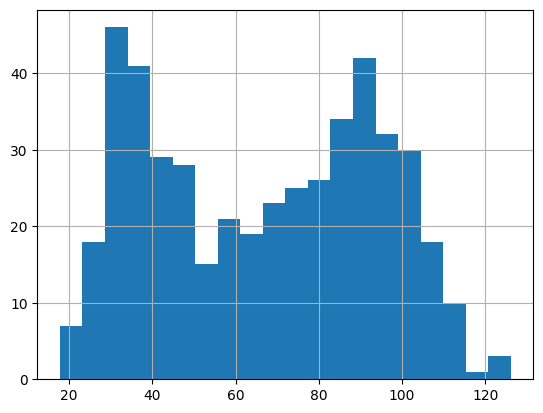

In [8]:
df["ab4240"].hist(bins=20)

### Output

In [9]:
df.drop(columns=["VISCODE2"], inplace=True)
df.to_csv(output_path, index=False)